# Expression Quality Control (Part 1)
This is a template notebook for performing preliminary quality control on your organism's expression data.

## Setup

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from os import path

In [2]:
sns.set_style('ticks')

### Inputs

Enter path of log-TPM, MultiQC, and metadata files here

In [5]:
metadata_file = path.join('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/4_unique_conditions/3_conditions_in.xlsx') # Enter log-TPM filename here
logTPM_file = path.join('/home/amy/Documents/GitHub/modulome-C_Glutamicum_Microarray_clean/5_make_conditions_ID/1_data_condition_ID.xlsx') # Enter metadata filename here



### Load expression data

In [6]:
DF_log_tpm = pd.read_excel(logTPM_file,index_col=0).fillna(0)
print('Number of genes:',DF_log_tpm.shape[0])
print('Number of samples:',DF_log_tpm.shape[1])
DF_log_tpm.head()

Number of genes: 1608
Number of samples: 3055


,Sample name,Platform,Mean/Median,Fluorescence,Label strain,cg0001,cg0002,cg0004,cg0005,cg0006,...,cg4001,cg4002,cg4003,cg4004,cg4005,cg4006,cg4007,Sample ID.1,Experiment ID,condition
Sample ID,,,,,,,,,,,,,,,,,,,,,
GSM5197852,∆6C (0.75 µM mitomycin C) vs. WT (0.75 µM mito...,Agilent,Median,F635,Cy5,404.687,0.0,2932.104,333.0,79.0,...,0.0,0.0,0.0,0.0,2334.565,0.0,592.0,GSM5197852,Experiment257_Source1_Agilent,Condition326
GSM5197852,∆6C (0.75 µM mitomycin C) vs. WT (0.75 µM mito...,Agilent,Median,F635,Cy3,2507.044,0.0,7801.139,1978.0,1849.0,...,0.0,0.0,0.0,0.0,13018.535,0.0,919.0,GSM5197852,Experiment257_Source2_Agilent,Condition536
GSM5197853,∆6C (0.75 µM mitomycin C) vs. WT (0.75 µM mito...,Agilent,Median,F635,Cy5,-686.000,0.0,1997.000,0.0,0.0,...,0.0,0.0,0.0,0.0,1123.540,0.0,0.0,GSM5197853,Experiment257_Source1_Agilent,Condition326
GSM5197853,∆6C (0.75 µM mitomycin C) vs. WT (0.75 µM mito...,Agilent,Median,F635,Cy3,1707.000,0.0,4148.440,0.0,0.0,...,0.0,0.0,0.0,0.0,7716.179,0.0,0.0,GSM5197853,Experiment257_Source2_Agilent,Condition536
GSM5197854,∆6C (0.75 µM mitomycin C) vs. WT (0.75 µM mito...,Agilent,Median,F635,Cy5,-88.000,0.0,1793.654,291.0,269.0,...,0.0,0.0,0.0,0.0,1434.875,0.0,366.0,GSM5197854,Experiment257_Source1_Agilent,Condition326


### Load metadata

In [7]:
DF_metadata = pd.read_csv(metadata_file,index_col=0,sep='\t')
print('Number of samples with metadata:',DF_metadata.shape[0])
DF_metadata.head()

Number of samples with metadata: 344


,Run,SortedStrain,ProjectID,TaxID,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,...,Histological_Type,Body_Site,CenterName,Submission,dbgap_study_accession,Consent,RunHash,ReadHash,R1,R2
Experiment,,,,,,,,,,,,,,,,,,,,,
DRX300641,DRR012600,SH1000 (NCTC8325 der.),855657,426430,2014-04-02 23:24:41,2014-03-27 8:05:18,26216809,943805124,0,36,...,NaN,NaN,UT_MGS,DRA001015,NaN,public,AB575DA15065B5677C69CDB6BB83F2AF,4BF3B159DC3D0AF10FBA0AC579831C08,NaN,NaN
DRX300642,DRR012601,SH1000 (NCTC8325 der.),855657,426430,2014-04-02 23:24:41,2014-03-27 8:06:01,33989978,1223639208,0,36,...,NaN,NaN,UT_MGS,DRA001015,NaN,public,DCFEE2373B87EFFEC851C35507DCFA51,F3ED403B99626EC42278785AFA16ABE4,NaN,NaN
DRX300643,DRR012602,SH1000 (NCTC8325 der.),855657,426430,2014-04-02 23:24:41,2014-03-27 8:05:41,27655098,995583528,0,36,...,NaN,NaN,UT_MGS,DRA001015,NaN,public,A53F82EA60FE5ADF9CE14B929D9CE0E6,CCD6637AA77C0F031841E3F543A8DE7D,NaN,NaN
ERX1222798,DRR012603,HG001 (NCTC 8325 der.),309786,426430,2014-04-02 23:24:41,2014-03-27 8:05:03,12993070,467750520,0,36,...,NaN,NaN,UT_MGS,DRA001015,NaN,public,68EB93D662F21875786CE2A33453EED8,3EF11F12DFFA8640A6D3C63F24AB5039,NaN,NaN
ERX1222799,DRR012604,HG001 (NCTC 8325 der.),309786,426430,2014-04-02 23:24:41,2014-03-27 8:05:25,13167447,474028092,0,36,...,NaN,NaN,UT_MGS,DRA001015,NaN,public,297328D7DB35343EDF31DA44C8F30374,921F3308F6391114AF79E74DD9664BF7,NaN,NaN


### Remove extra sample rows

Ensure that metadata and qc_stats data contain all log_tpm sample information.

In [8]:
assert(set(DF_log_tpm.columns) - set(DF_metadata.index) == set())
assert(set(DF_log_tpm.columns) - set(DF_qc_stats.index) == set())

In [9]:
DF_metadata = DF_metadata.loc[DF_log_tpm.columns]
DF_qc_stats = DF_qc_stats.loc[DF_log_tpm.columns]

## Check QC statistics

### FastQC quality control

In [10]:
fastqc_cols = ['per_base_sequence_quality',
       'per_tile_sequence_quality', 'per_sequence_quality_scores',
       'per_base_sequence_content', 'per_sequence_gc_content',
       'per_base_n_content', 'sequence_length_distribution',
       'sequence_duplication_levels', 'overrepresented_sequences',
       'adapter_content']

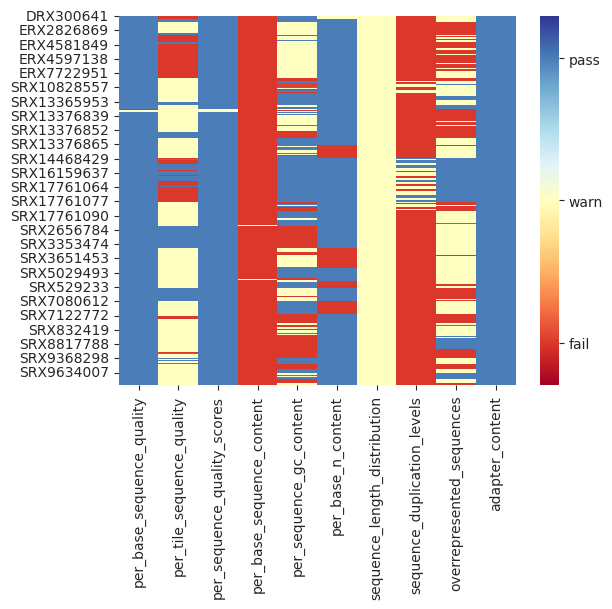

In [11]:
DF_fastqc = DF_qc_stats[fastqc_cols]
ax = sns.heatmap(DF_fastqc.replace('pass',1).replace('warn',0).replace('fail',-1),
            cmap='RdYlBu',vmax=1.3,vmin=-1.3)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['fail','warn','pass'])

The following four categories are the most important:
* per_base_sequence_quality
* per_sequence_quality_scores
* per_base_n_content
* adapter_content
    
If a sample does not pass any of these four categories, discard the sample.

In [12]:
fastqc_fail_cols = ['per_base_sequence_quality','per_sequence_quality_scores','per_base_n_content','adapter_content']

In [13]:
DF_failed_fastqc = DF_fastqc[fastqc_fail_cols][(DF_fastqc[fastqc_fail_cols] != 'pass').any(axis=1)]
DF_failed_fastqc[fastqc_fail_cols]

,per_base_sequence_quality,per_sequence_quality_scores,per_base_n_content,adapter_content
DRX300641,pass,pass,warn,pass
DRX300642,pass,pass,warn,pass
DRX300643,pass,pass,warn,pass
SRX13376831,fail,warn,pass,pass
SRX13376834,warn,warn,pass,pass
SRX13376835,warn,warn,pass,pass
SRX13376866,pass,pass,fail,pass
SRX13827967,pass,pass,fail,pass
SRX13827968,pass,pass,fail,pass
SRX13827969,pass,pass,fail,pass


Mark samples that passed.

In [14]:
DF_metadata['passed_fastqc'] = ~DF_metadata.index.isin(DF_failed_fastqc.index)

### Number of aligned reads

The following histogram shows how many reads map to coding sequences (i.e. mRNA). Too few aligned reads reduces the sensitivity of the resulting data.

In [15]:
min_mrna_reads = 500000 # Minimum number of reads mapped to mRNA (500,000)

Text(0.5, 1.0, 'Number of reads mapped to CDS')

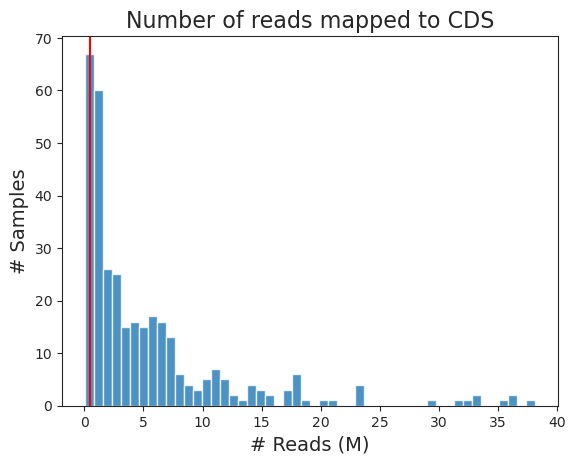

In [16]:
fig,ax = plt.subplots()
ax.hist(DF_qc_stats['Assigned']/1e6,bins=50,alpha=0.8)
ymin,ymax = ax.get_ylim()
ax.vlines(min_mrna_reads/1e6,ymin,ymax,color='r')
ax.set_ylim((ymin,ymax))
ax.set_xlabel('# Reads (M)',fontsize=14)
ax.set_ylabel('# Samples',fontsize=14)
ax.set_title('Number of reads mapped to CDS',fontsize=16)

Identify samples with poor read depth:

In [17]:
DF_failed_mrna = DF_qc_stats[DF_qc_stats['Assigned'] < min_mrna_reads].sort_values('Assigned')
DF_failed_mrna

,Total,Assigned,Unassigned_rRNA,Unassigned_Unmapped,Unassigned_Read_Type,Unassigned_Singleton,Unassigned_MappingQuality,Unassigned_Chimera,Unassigned_FragmentLength,Unassigned_Duplicate,...,r_written,bp_processed,quality_trimmed,bp_written,percent_trimmed,se_sense,se_antisense,failed,pe_sense,pe_antisense
SRX4965407,492311.0,23158.0,179.0,461132.0,0.0,0.0,0.0,0.0,34.0,0.0,...,504667,37850025,686000,36829467,2.696321,0.0000,0.0000,0.3995,0.3518,0.2487
SRX7711431,92414148.0,26278.0,592520.0,91756533.0,0.0,0.0,0.0,0.0,0.0,0.0,...,93074333,4746790983,86512218,4573299043,3.654931,0.7120,0.0156,0.2724,0.0000,0.0000
SRX7711430,70314022.0,28264.0,437822.0,69826033.0,0.0,0.0,0.0,0.0,0.0,0.0,...,70761181,3608820231,45296309,3496318200,3.117419,0.7394,0.0139,0.2467,0.0000,0.0000
SRX7711429,61837336.0,34798.0,510664.0,61264604.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62164835,3170406585,44488761,3081329802,2.809633,0.7307,0.0141,0.2553,0.0000,0.0000
SRX17761079,804926.0,92598.0,85.0,485406.0,0.0,0.0,0.0,0.0,197116.0,0.0,...,808089,61036817,462272,60446560,0.967051,0.0000,0.0000,0.4796,0.4305,0.0899
SRX17761084,820793.0,100145.0,101.0,492673.0,0.0,0.0,0.0,0.0,201987.0,0.0,...,823500,62055805,367367,61426046,1.014827,0.0000,0.0000,0.5093,0.4325,0.0581
SRX17761085,853338.0,100507.0,79.0,480370.0,0.0,0.0,0.0,0.0,239833.0,0.0,...,856395,64549961,52396,64261341,0.447127,0.0000,0.0000,0.4823,0.4264,0.0913
SRX17761078,1008264.0,112364.0,215.0,622552.0,0.0,0.0,0.0,0.0,244837.0,0.0,...,1012014,76370483,1293416,74844771,1.997777,0.0000,0.0000,0.5236,0.4246,0.0518
SRX10828555,326702.0,117297.0,85.0,136326.0,0.0,0.0,0.0,0.0,57200.0,0.0,...,327708,95390663,829641,94468257,0.966977,0.0000,0.0000,0.5129,0.2428,0.2444
SRX17761080,1265411.0,123117.0,118.0,792500.0,0.0,0.0,0.0,0.0,315895.0,0.0,...,1269919,95659527,361197,94914160,0.779187,0.0000,0.0000,0.4723,0.4963,0.0314


Mark samples that passed.

In [18]:
DF_metadata['passed_reads_mapped_to_CDS'] = ~DF_metadata.index.isin(DF_failed_mrna.index)

### Examine Global Correlations

Only examine data that passed the first two steps.

In [19]:
metadata_passed_step2 = DF_metadata[DF_metadata[['passed_fastqc','passed_reads_mapped_to_CDS']].all(axis=1)]
DF_log_tpm_passed_step2 = DF_log_tpm[metadata_passed_step2.index]

A clustermap is a great way to visualize the global correlations between one sample and all others. The ``global_clustering`` function uses hierarchical clustering to identify specific clusters in the clustermap. The optional arguments are:

* ``threshold``: Threshold used to extract clusters from the hierarchy. To increase the number of clusters, decrease the value of ``threshold``. To decrease the number of clusters, increase the value of ``threshold`` (default: 0.3)
* ``figsize``: A tuple describing the length and width of the final clustermap. A larger figsize can make x and y-axis labels clearer.
* ``xticklabels``: Show NCBI SRA accession numbers on the x-axis
* ``yticklabels``: Show NCBI SRA accession numbers on the y-axis

In [20]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches

def global_clustering(data, threshold=0.4, xticklabels=False, yticklabels=False, figsize=(9,9)):
    
    # Retrieve clusters using fcluster 
    corr = data.corr()
    corr.fillna(0,inplace=True)
    dist = sch.distance.pdist(corr)
    link = sch.linkage(dist, method='complete')
    clst = pd.DataFrame(index=data.columns)
    clst['cluster'] = sch.fcluster(link, threshold * dist.max(), 'distance')

    # Get colors for each cluster
    cm = plt.cm.get_cmap('tab20')
    cluster_colors = dict(zip(clst.cluster.unique(), cm.colors))
    clst['color'] = clst.cluster.map(cluster_colors)

    print('Number of cluster: ', len(cluster_colors))
    
    legend_items = [patches.Patch(color=c, label=l) for l,c in cluster_colors.items()]
    
    sns.set(rc={'figure.facecolor':'white'})
    
    clst_map = sns.clustermap(data.corr(), 
                              figsize=figsize, 
                              row_linkage=link, 
                              col_linkage=link, 
                              col_colors=clst.color,
                              yticklabels=yticklabels, 
                              xticklabels=xticklabels,
                              vmin=0, 
                              vmax=1)
    
    legend = clst_map.ax_heatmap.legend(loc='upper left', 
                                        bbox_to_anchor=(1.01,0.85), 
                                        handles=legend_items,
                                        frameon=True)
    
    legend.set_title(title='Clusters',prop={'size':10})
    
    return clst['cluster']

Number of cluster:  7


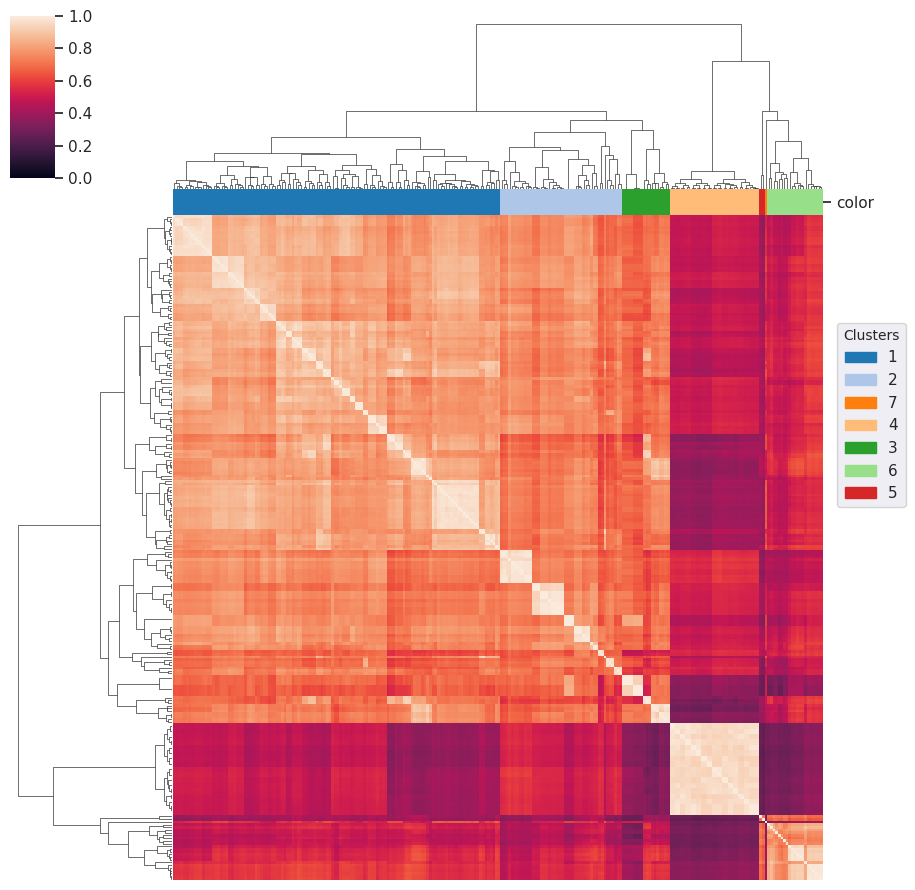

In [21]:
clusters = global_clustering(DF_log_tpm_passed_step2)

Select clusters to remove.

In [22]:
remove_clusters = [4,5,6,7]
passed_global_corr = clusters[~clusters.isin(remove_clusters)].index

The following code can be adapted to see the NCBI SRA accession for samples in each cluster.

In [23]:
clusters[clusters == 1]

ERX2826862    1
ERX2826863    1
ERX2826864    1
ERX2826865    1
ERX2826866    1
             ..
SRX9634017    1
SRX9634018    1
SRX9634019    1
SRX9634020    1
SRX965931     1
Name: cluster, Length: 124, dtype: int32

Re-cluster samples to ensure all outliers were removed.

In [24]:
DF_log_tpm_passed_step3 = DF_log_tpm[passed_global_corr]

Number of cluster:  15


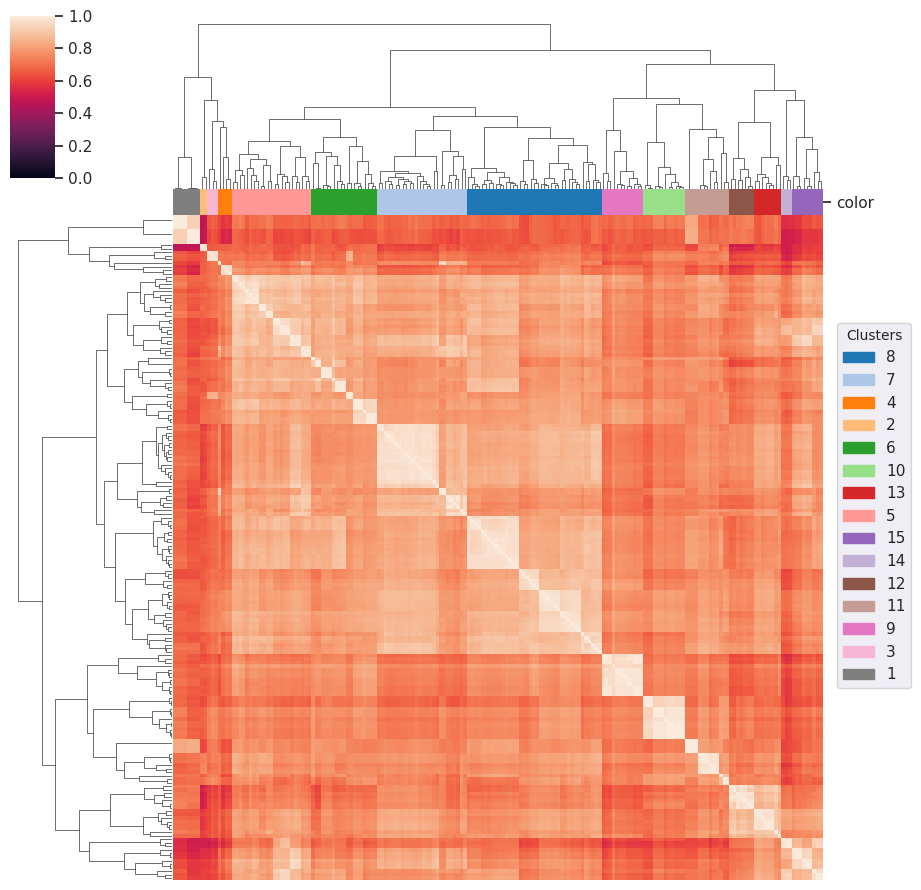

In [25]:
clusters = global_clustering(DF_log_tpm_passed_step3)

Once you are satisfied with your dataset, mark the samples that passed the global correlation

In [26]:
DF_metadata['passed_global_correlation'] = DF_metadata.index.isin(passed_global_corr)

In [27]:
DF_metadata.head()

,Run,SortedStrain,ProjectID,TaxID,ReleaseDate,LoadDate,spots,bases,spots_with_mates,avgLength,...,Submission,dbgap_study_accession,Consent,RunHash,ReadHash,R1,R2,passed_fastqc,passed_reads_mapped_to_CDS,passed_global_correlation
DRX300641,DRR012600,SH1000 (NCTC8325 der.),855657,426430,2014-04-02 23:24:41,2014-03-27 8:05:18,26216809,943805124,0,36,...,DRA001015,NaN,public,AB575DA15065B5677C69CDB6BB83F2AF,4BF3B159DC3D0AF10FBA0AC579831C08,NaN,NaN,False,False,False
DRX300642,DRR012601,SH1000 (NCTC8325 der.),855657,426430,2014-04-02 23:24:41,2014-03-27 8:06:01,33989978,1223639208,0,36,...,DRA001015,NaN,public,DCFEE2373B87EFFEC851C35507DCFA51,F3ED403B99626EC42278785AFA16ABE4,NaN,NaN,False,False,False
DRX300643,DRR012602,SH1000 (NCTC8325 der.),855657,426430,2014-04-02 23:24:41,2014-03-27 8:05:41,27655098,995583528,0,36,...,DRA001015,NaN,public,A53F82EA60FE5ADF9CE14B929D9CE0E6,CCD6637AA77C0F031841E3F543A8DE7D,NaN,NaN,False,False,False
ERX1222798,DRR012603,HG001 (NCTC 8325 der.),309786,426430,2014-04-02 23:24:41,2014-03-27 8:05:03,12993070,467750520,0,36,...,DRA001015,NaN,public,68EB93D662F21875786CE2A33453EED8,3EF11F12DFFA8640A6D3C63F24AB5039,NaN,NaN,True,False,False
ERX1222799,DRR012604,HG001 (NCTC 8325 der.),309786,426430,2014-04-02 23:24:41,2014-03-27 8:05:25,13167447,474028092,0,36,...,DRA001015,NaN,public,297328D7DB35343EDF31DA44C8F30374,921F3308F6391114AF79E74DD9664BF7,NaN,NaN,True,False,False


# Remove failed samples

In [28]:
qc_columns = ['passed_fastqc',
              'passed_reads_mapped_to_CDS',
              'passed_global_correlation']

In [29]:
pass_qc = DF_metadata[qc_columns].all(axis=1)
DF_metadata_passed = DF_metadata[pass_qc]

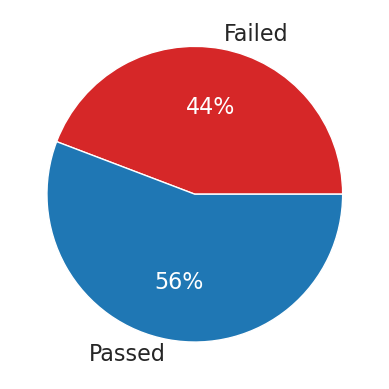

In [30]:
_,_,pcts = plt.pie(pass_qc.value_counts().reindex([False,True]),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')

# Save current metadata

Enter path of interim metadata files here. It is recommended that the ``metadata_qc.tsv`` file is copied to a new ``metadata_qc_curated.tsv`` file before editing. This will prevent this notebook from over-writing any curated metadata.

In [33]:
metadata_all_qc_file = path.join('..', 'data', 'interim', '/home/amy/Documents/GitHub/BENG212_S_aureus/3_quality control/NCTC8325_all.tsv') # Enter filename for full metadata QC file
metadata_qc_file = path.join('..', 'data', 'interim', '/home/amy/Documents/GitHub/BENG212_S_aureus/3_quality control/NCTC8325_part1.tsv') # Enter filename for metadata QC file with only passing datasets

In [34]:
DF_metadata.to_csv(metadata_all_qc_file, sep='\t')
DF_metadata_passed.to_csv(metadata_qc_file, sep='\t')

# Metadata Curation

The next step is to curate the metadata. At a minimum, three new columns must be added to the metadata sheet:
* ``project``: Nickname for the project. Each bioproject should have a unique project IDs.
* ``condition``: Nickname for the experimental condition. Biological/technical replicates must have identical condition IDs.
* ``reference_condition``: Condition ID of the reference condition. Each project has a single reference condition (See [example metadata sheet](https://github.com/SBRG/nf-rnaseq-bacteria/blob/master/example_data/processed_data/metadata_curated.tsv))

Additional columns may include:
* ``strain_description``: The strain name, and any knock-outs or overexpressed genes
* ``base_media``: Media used (e.g. ``M9``)
* ``carbon_source``: Primary carbon source, with concentration in parentheses (e.g. ``glucose(.4%)``). This is usually empty for undefined media.
* ``nitrogen_source``: Primary nitrogen source, with concentration in parentheses (e.g. ``NH4Cl(1M)``). This is usually empty for undefined media.
* ``aerobicity``: Usually ``aerobic`` or ``anaerobic``
* ``treatment``: Any additional supplements or treatments added to the base media (e.g. ``thiamine(0.1M)`` or ``ampicillin(100ug/mL)``)
* ``temperature``
* ``pH``
* ``OD``: Approximate optical density of cells when selected for library preparation
* ``growth_phase``: e.g. ``mid-exponential`` or ``stationary``
* ``culture_type``: Usually ``batch`` or ``chemostat``
* ``skip``: Whether to skip a sample due to external reasons (e.g. not traditional RNA-seq, distant strain, or lack of metadata)

If specific metadata entries are not reported for a sample, these can be left blank. However, if no metadata can be gleaned from public databases, then we recommend discarding the samples.

Once the metadata has been curated, proceed to [Step 2](https://github.com/avsastry/modulome-workflow/edit/main/3_quality_control/expression_QC_part2.ipynb)